# Project Group 7

## Predicting Travel Times of Uber by Analysing the Effects of Weather Conditions and Traffic Density

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read all the datasets from CSV file

**1. Read 'Travel_Times_Daily', 'Temperature', and 'Rainfall' datasets.** 

In [2]:
main_df = pd.read_csv('data/Travel_Times_Daily.csv')
temperature_df = pd.read_csv('data/Temperature_2019.csv')
rainfall_df = pd.read_csv('data/Rainfall_2019.csv')
rainfall_airport_df=pd.read_csv('data/Rainfall_airport.csv')

In [3]:
## Join temperature and rainfall into the main data based on index. 
combine_df1 = main_df.join(temperature_df['Maximum temperature (Degree C)'])
print(combine_df1.shape)
combine_df2 = combine_df1.join(rainfall_df['Rainfall amount (millimetres)'])
print(combine_df2.shape)
rainfall_airport_df.rename(columns={'Rainfall amount (millimetres)':'Rainfall_airport amount'}, inplace=True)
combine_df2 = combine_df2.join(rainfall_airport_df['Rainfall_airport amount'])
combine_df2 = combine_df2.set_index('Date')

(365, 24)
(365, 25)


**2. Read Toll Data of each month.** 

In [4]:
tolldata1 = pd.read_csv('data/ED_trips_2019-01.csv',index_col = 'Date')
tolldata2 = pd.read_csv('data/ED_trips_2019-02.csv', index_col = 'Date')
tolldata3 = pd.read_csv('data/ED_trips_2019-03.csv', index_col = 'Date')
tolldata4 = pd.read_csv('data/ED_trips_2019-04.csv', index_col = 'Date')
tolldata5 = pd.read_csv('data/ED_trips_2019-05.csv', index_col = 'Date')
tolldata6 = pd.read_csv('data/ED_trips_2019-06.csv', index_col = 'Date')
tolldata7 = pd.read_csv('data/ED_trips_2019-07.csv', index_col = 'Date')
tolldata8 = pd.read_csv('data/ED_trips_2019-08.csv', index_col = 'Date')
tolldata9 = pd.read_csv('data/ED_trips_2019-09.csv', index_col = 'Date')
tolldata10 = pd.read_csv('data/ED_trips_2019-10.csv', index_col = 'Date')
tolldata11 = pd.read_csv('data/ED_trips_2019-11.csv', index_col = 'Date')
tolldata12 = pd.read_csv('data/ED_trips_2019-12.csv', index_col = 'Date')

In [5]:
## GROUP BY TOTALVOLUME BASED ON DATE.

# January
n_tolldata1=tolldata1.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata1 = n_tolldata1.set_index('Date')
# February
n_tolldata2=tolldata2.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata2 = n_tolldata2.set_index('Date')
# March
n_tolldata3=tolldata3.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata3 = n_tolldata3.set_index('Date')
# April
n_tolldata4=tolldata4.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata4 = n_tolldata4.set_index('Date')
# May
n_tolldata5=tolldata5.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata5 = n_tolldata5.set_index('Date')
# June
n_tolldata6=tolldata6.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata6 = n_tolldata6.set_index('Date')
# July
n_tolldata7=tolldata7.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata7 = n_tolldata7.set_index('Date')
# August
n_tolldata8=tolldata8.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata8 = n_tolldata8.set_index('Date')
# September
n_tolldata9=tolldata9.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata9 = n_tolldata9.set_index('Date')
# October
n_tolldata10=tolldata10.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata10 = n_tolldata10.set_index('Date')
# November
n_tolldata11=tolldata11.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata11 = n_tolldata11.set_index('Date')
# December
n_tolldata12=tolldata12.groupby(['Date'])['TotalVolume'].sum().reset_index()
n_tolldata12 = n_tolldata12.set_index('Date')

In [6]:
n_tolldata1.head()

,TotalVolume
Date,
2019-01-01,36585
2019-01-02,47896
2019-01-03,51849
2019-01-04,54417
2019-01-05,48116


**3. Create final dataframe.**

In [7]:
## Create a new dataframe included all tolldata in 2019.
frames = [n_tolldata1, n_tolldata2, n_tolldata3, 
          n_tolldata4, n_tolldata5,n_tolldata6 
          ,n_tolldata7, n_tolldata8, n_tolldata9,
         n_tolldata10, n_tolldata11, n_tolldata12]
final_tolldata = pd.concat(frames)

In [8]:
final_tolldata.shape

(365, 1)

In [9]:
## Join toll data into the previous dataframe 'combine_df2'.
combine_df3 = combine_df2.join(final_tolldata, on = 'Date', how = 'inner')
combine_df3.head()

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Maximum temperature (Degree C),Rainfall amount (millimetres),Rainfall_airport amount,TotalVolume
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",858,606,1215,741.0,546.0,1005.0,...,977,657,1452,733.0,530.0,1013.0,31.4,10.4,5.6,36585
2019-01-02,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",897,645,1246,928.0,634.0,1359.0,...,873,652,1169,NaN,NaN,NaN,29.7,0.0,0.0,47896
2019-01-03,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",915,658,1273,903.0,663.0,1230.0,...,841,643,1101,NaN,NaN,NaN,28.5,0.0,0.0,51849
2019-01-04,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",869,619,1219,793.0,567.0,1110.0,...,916,624,1344,NaN,NaN,NaN,31.4,0.0,0.0,54417
2019-01-05,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",813,606,1090,741.0,555.0,991.0,...,818,615,1088,NaN,NaN,NaN,37.4,0.0,0.0,48116


In [10]:
# Drop columns which have many 'NaN' values.
drop_df = combine_df3.drop(['Early Morning Mean Travel Time (Seconds)',
                         'Early Morning Range - Lower Bound Travel Time (Seconds)',
                         'Early Morning Range - Upper Bound Travel Time (Seconds)'], axis = 1)
print(drop_df.shape)

(365, 23)


In [11]:
# Final dataframe would be used in this project.
final_df = drop_df.dropna()
print(final_df.shape)
final_df.head()

(354, 23)


,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Maximum temperature (Degree C),Rainfall amount (millimetres),Rainfall_airport amount,TotalVolume
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",858,606,1215,741.0,546.0,1005.0,...,851,619,1169,977,657,1452,31.4,10.4,5.6,36585
2019-01-02,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",897,645,1246,928.0,634.0,1359.0,...,866,632,1187,873,652,1169,29.7,0.0,0.0,47896
2019-01-03,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",915,658,1273,903.0,663.0,1230.0,...,928,669,1285,841,643,1101,28.5,0.0,0.0,51849
2019-01-04,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",869,619,1219,793.0,567.0,1110.0,...,880,635,1218,916,624,1344,31.4,0.0,0.0,54417
2019-01-05,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",813,606,1090,741.0,555.0,991.0,...,838,633,1109,818,615,1088,37.4,0.0,0.0,48116


### Data Visualizations

In [12]:
traveltime_data = pd.DataFrame({'Daily Mean Travel Time (Seconds)': final_df["Daily Mean Travel Time (Seconds)"]})
traveltime_data.head()

,Daily Mean Travel Time (Seconds)
Date,
2019-01-01,858
2019-01-02,897
2019-01-03,915
2019-01-04,869
2019-01-05,813


In [13]:
new_traveltime = traveltime_data.reset_index()
new_traveltime.Date = pd.to_datetime(new_traveltime.Date)

In [14]:
new_traveltime.set_index('Date', inplace = True)

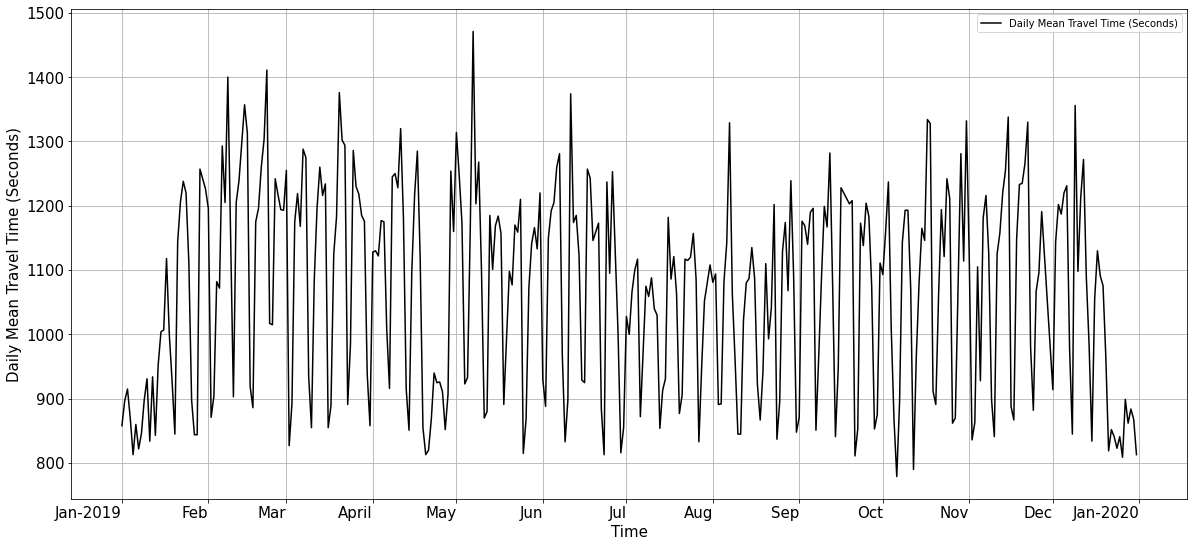

In [15]:
import matplotlib.dates as mdates
months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter("%m")
new_traveltime.plot(color = 'k')
ax = plt.gca()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.set_xticklabels(['Jan-2019','Feb','Mar','April','May','Jun','Jul','Aug',
'Sep','Oct','Nov','Dec','Jan-2020'],rotation = 0, size = 15)
ax.grid()
plt.xlabel('Time',size = 15) 
plt.ylabel('Daily Mean Travel Time (Seconds)',size =15) 
plt.setp(ax.get_yticklabels(), fontsize=15)
plt.gcf().set_size_inches(20, 10)

**Comment:**   
As can be seen from the graph, Uber's travel time in one year (2019) has significant fluctuations. The average daily travel time peaked around May, with more than 1,400 seconds. Meanwhile, Uber's average daily travel time hit a low in October, with seconds below 800. The rest of the months are nothing special because the travel time in the remaining months mostly ranges from 800 to about 1400 seconds. The two-month(May - October) daily commute chart will be created to get a better view, on which day of May Uber's travel time is the highest, and which day of October it will be the lowest.

In [16]:
highest_traveltime = traveltime_data.loc['2019-05-01':'2019-05-31']
highest_traveltime.head()

,Daily Mean Travel Time (Seconds)
Date,
2019-05-01,1314
2019-05-02,1248
2019-05-03,1173
2019-05-04,923
2019-05-05,933


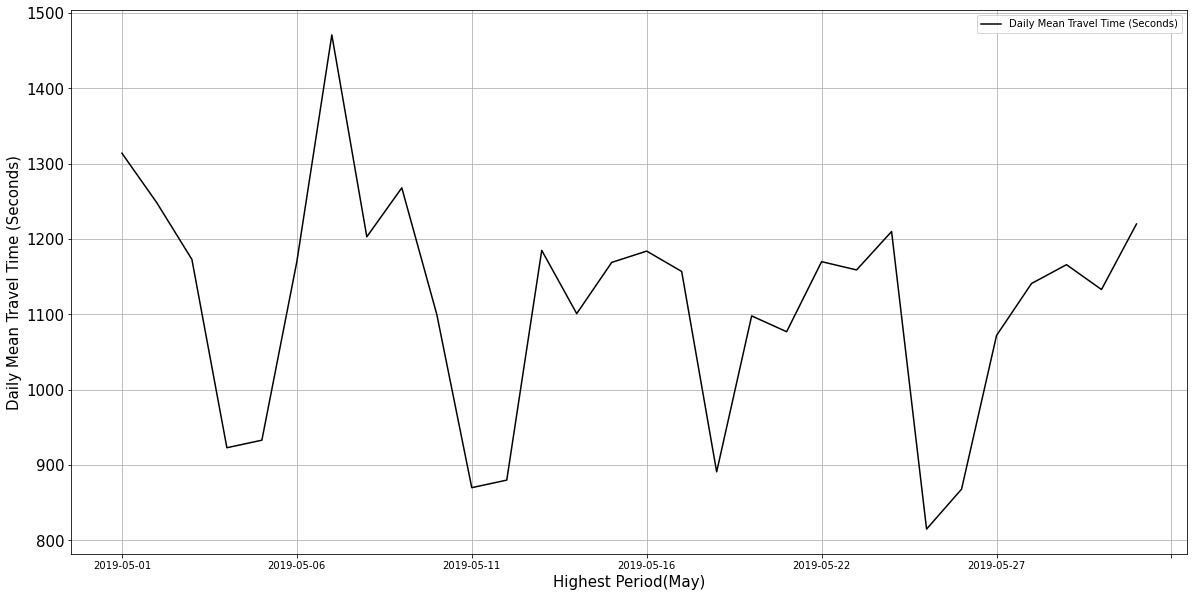

In [17]:
highest_traveltime.plot(color = 'k')
ax = plt.gca()
ax.grid()
plt.xlabel('Highest Period(May)',size = 15) 
plt.ylabel('Daily Mean Travel Time (Seconds)',size =15) 
plt.setp(ax.get_yticklabels(), fontsize=15)
plt.gcf().set_size_inches(20, 10)

**Comment:**   
After a graph showing, Uber's average daily travel times for May was created, it can be clearly seen that on May 7, Ubers travel time peaked at over 1,400 close to 1500 seconds.

In [18]:
lowest_traveltime = traveltime_data.loc['2019-10-01':'2019-10-30']
lowest_traveltime.head()

,Daily Mean Travel Time (Seconds)
Date,
2019-10-01,1093
2019-10-02,1160
2019-10-03,1237
2019-10-04,1011
2019-10-05,868


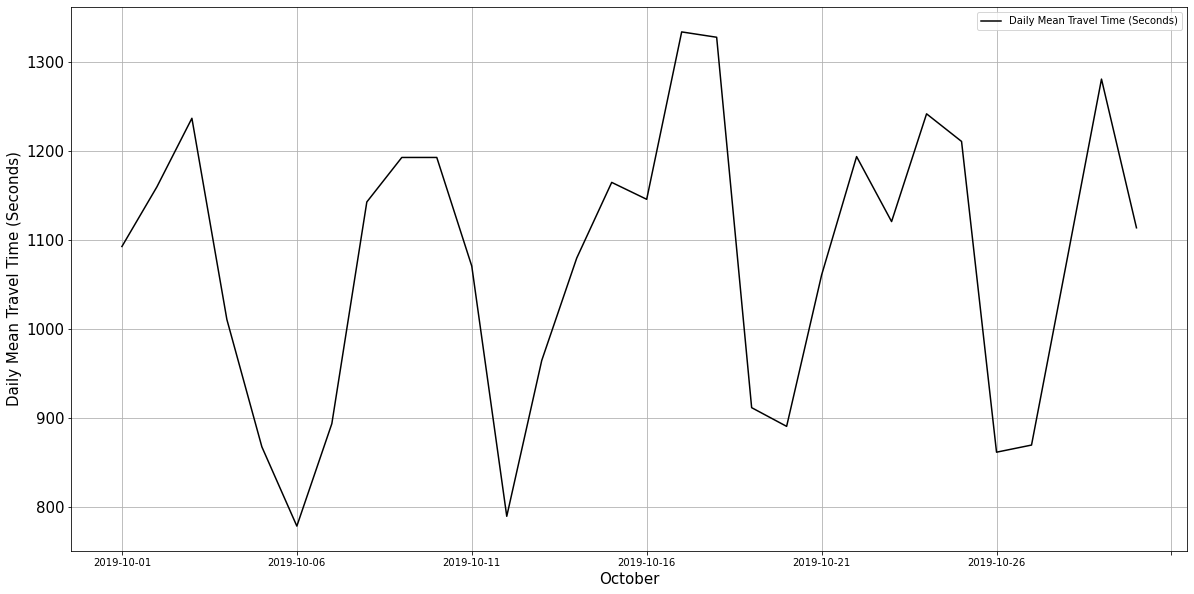

In [19]:
lowest_traveltime.plot(color = 'k')
ax = plt.gca()
ax.grid()
plt.xlabel('October',size = 15) 
plt.ylabel('Daily Mean Travel Time (Seconds)',size =15) 
plt.setp(ax.get_yticklabels(), fontsize=15)
plt.gcf().set_size_inches(20, 10)

**Comment:**    
As can be seen from the graph showing the average daily travel time of October. There are two days in the month where the average travel time is at its lowest for all of 2019, October 6 and October 12.

### Regression Model

#### Modelling using 2 features (i.e.'Maximum temperature (Degree C)', 'Rainfall amount (millimetres)') only

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
X = final_df[['Maximum temperature (Degree C)', 'Rainfall amount (millimetres)']]
y = final_df['Daily Mean Travel Time (Seconds)']

In [23]:
# Split the data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(283, 2)
(283,)
(71, 2)
(71,)


In [24]:
# Create and train the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predictions from our model
y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)

In [26]:
# Calculating scores on training and testing sets using standard regression metrics
from sklearn import metrics
print('Scores on training set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_hat)))
print("R Squared:", metrics.r2_score(y_train, y_train_hat))
print("MAE:", metrics.mean_absolute_error(y_train, y_train_hat))
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_hat))
print()
print("Scores on testing set:")
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))
print("R Squared:", metrics.r2_score(y_test, y_test_hat))
print("MAE:", metrics.mean_absolute_error(y_test, y_test_hat))
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_hat))

Scores on training set:
RMSE: 158.17732190392238
R Squared: 0.001998065297997287
MAE: 136.29330838755146
MAPE: 13.308872325342913

Scores on testing set:
RMSE: 158.49592312282905
R Squared: -0.0482985815304211
MAE: 142.32000361515742
MAPE: 14.467807600481377


**Comment:** In this case, the model has been tested on both the training set and the testing set. The RMSE in both of these tests has seemingly equal value. However, R Squared is significantly different. When testing the model on the training set, the R Squared is 0.002. It is a relatively small number. And R Squared in testing set is -0.048. It is even negative. From the results of R Squared, we can conclude that using these 2 features is really ineffective. Even the model is overfitting.

#### Modelling using 3 features (i.e.'Maximum temperature (Degree C)', 'Rainfall amount (millimetres)', 'TotalVolume')

In [27]:
X = final_df[['Maximum temperature (Degree C)', 'Rainfall amount (millimetres)', 'TotalVolume']]
y = final_df['Daily Mean Travel Time (Seconds)']

In [28]:
# Split the data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(283, 3)
(283,)
(71, 3)
(71,)


In [29]:
# Create and train the model
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predictions from our model
y_train_hat = lm1.predict(X_train)
y_test_hat = lm1.predict(X_test)

In [31]:
# Calculating scores on training and testing sets using standard regression metrics
from sklearn import metrics
print('Scores on training set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_hat)))
print("R Squared:", metrics.r2_score(y_train, y_train_hat))
print("MAE:", metrics.mean_absolute_error(y_train, y_train_hat))
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_hat))
print()
print("Scores on testing set:")
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))
print("R Squared:", metrics.r2_score(y_test, y_test_hat))
print("MAE:", metrics.mean_absolute_error(y_test, y_test_hat))
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_hat))

Scores on training set:
RMSE: 109.65950551451667
R Squared: 0.5203377800344515
MAE: 85.77016488954706
MAPE: 8.256404596446389

Scores on testing set:
RMSE: 97.16384553109447
R Squared: 0.6060344956527998
MAE: 77.23433020044473
MAPE: 7.6926993869600295


**Comment:** In this case, the number of features has been increased to three to consider its effectiveness. As can be seen from the results, RMSE showed signs of decrease when testing the model on the training set as well as the testing set. Furthermore, R Squared also increased significantly. R Squared in training set increased from 0.002 to 0.520 and R Squared in testing set increased from the negative number to 0.606. From the R Squared result, it could conclude that using the three features can be more efficient, and the model does not appear to show signs of overfitting.

### Correlation

In [32]:
plt.style.use('seaborn')
import seaborn as sns
relationship= final_df[['Daily Mean Travel Time (Seconds)', 'AM Mean Travel Time (Seconds)','PM Mean Travel Time (Seconds)','Midday Mean Travel Time (Seconds)','Maximum temperature (Degree C)', 'Rainfall amount (millimetres)','Rainfall_airport amount', 'TotalVolume']]

In [33]:
# test the correlation among key variables
relationship.corr()

,Daily Mean Travel Time (Seconds),AM Mean Travel Time (Seconds),PM Mean Travel Time (Seconds),Midday Mean Travel Time (Seconds),Maximum temperature (Degree C),Rainfall amount (millimetres),Rainfall_airport amount,TotalVolume
Daily Mean Travel Time (Seconds),1.000000,0.899445,0.741713,0.549314,0.019246,-0.007389,0.030828,0.732574
AM Mean Travel Time (Seconds),0.899445,1.000000,0.485350,0.333102,-0.002020,0.013791,0.054142,0.653135
PM Mean Travel Time (Seconds),0.741713,0.485350,1.000000,0.502212,0.087907,-0.062606,-0.051010,0.626433
Midday Mean Travel Time (Seconds),0.549314,0.333102,0.502212,1.000000,0.117711,0.038428,0.023397,0.534699
Maximum temperature (Degree C),0.019246,-0.002020,0.087907,0.117711,1.000000,-0.201866,-0.175780,0.009956
Rainfall amount (millimetres),-0.007389,0.013791,-0.062606,0.038428,-0.201866,1.000000,0.879973,-0.097144
Rainfall_airport amount,0.030828,0.054142,-0.051010,0.023397,-0.175780,0.879973,1.000000,-0.085550
TotalVolume,0.732574,0.653135,0.626433,0.534699,0.009956,-0.097144,-0.085550,1.000000


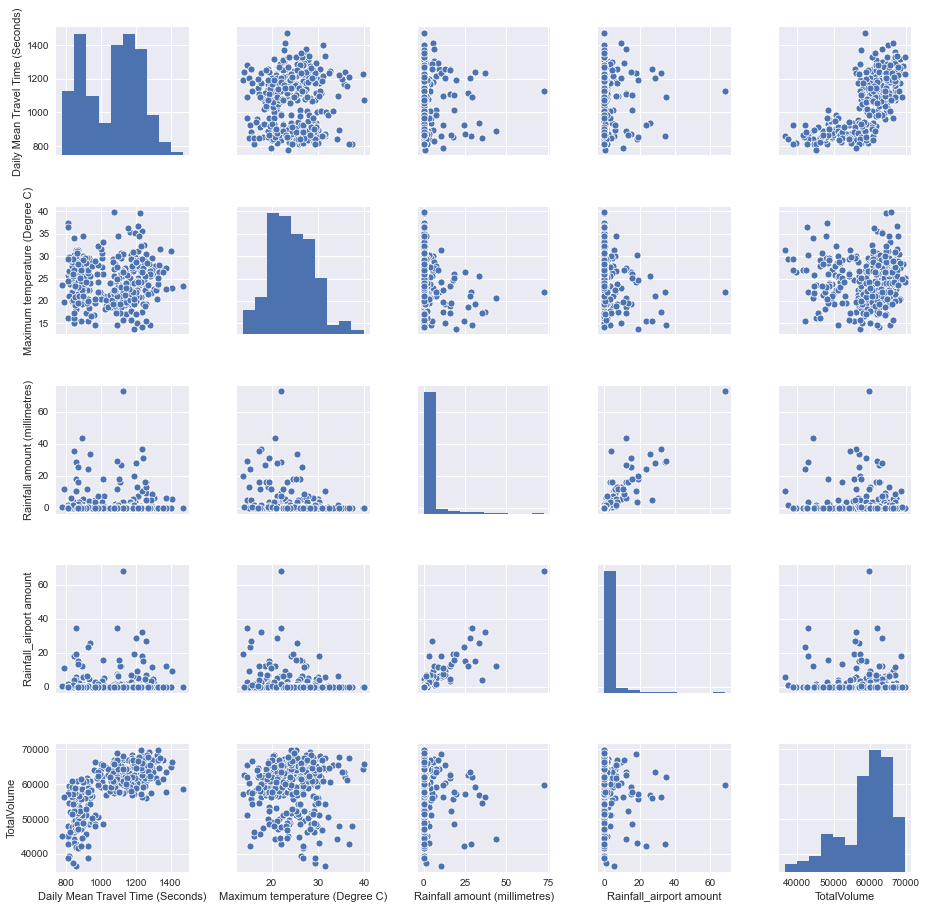

In [34]:
import seaborn as sns
sns.pairplot(relationship[['Daily Mean Travel Time (Seconds)', 'Maximum temperature (Degree C)','Rainfall amount (millimetres)',
                          'Rainfall_airport amount','TotalVolume']])

**Conclusion:**

There is a strong uphill (positive) linear relationship between total volumn and daily mean travel time (0.73).

Unexpectedly, there is no observed relationship among rainfall amount, temperature and travel time due to an extremely low correlation coefficient of nearly 0.

Rainfall amount from Sydney station and airport station have a high correlation of 0.88. However, it also shows that the data from 2 stations is not exactly the same, which means they can serve as 2 variables for a better result.

### Predict traveling time levels

Since the linear model does not give a good result and it's hard to predict accurate travel time based on only 4 variables, we decide to predict level of travel time instead
   * 1: quick
   * 2: moderate
   * 3: slow

In [35]:
# calculate the difference between each level
gap = (final_df['Daily Mean Travel Time (Seconds)'].max()-final_df['Daily Mean Travel Time (Seconds)'].min())/3

In [36]:
# the travel time of each level
quick = final_df['Daily Mean Travel Time (Seconds)'].min() + gap
moderate= quick+gap
slow= moderate+gap

In [37]:
# Make a new column to classify the level of traveling time: quick(1), moderate(2) and slow(3)
final_df['level'] = pd.cut(x=final_df['Daily Mean Travel Time (Seconds)'], bins=[0,quick, moderate, slow], labels=['1','2','3']) 

<ipython-input-37-a88fd81846c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['level'] = pd.cut(x=final_df['Daily Mean Travel Time (Seconds)'], bins=[0,quick, moderate, slow], labels=['1','2','3'])


In [38]:
final_df.head()

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),AM Range - Upper Bound Travel Time (Seconds),...,Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Maximum temperature (Degree C),Rainfall amount (millimetres),Rainfall_airport amount,TotalVolume,level
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",858,606,1215,741.0,546.0,1005.0,...,619,1169,977,657,1452,31.4,10.4,5.6,36585,1
2019-01-02,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",897,645,1246,928.0,634.0,1359.0,...,632,1187,873,652,1169,29.7,0.0,0.0,47896,1
2019-01-03,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",915,658,1273,903.0,663.0,1230.0,...,669,1285,841,643,1101,28.5,0.0,0.0,51849,1
2019-01-04,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",869,619,1219,793.0,567.0,1110.0,...,635,1218,916,624,1344,31.4,0.0,0.0,54417,1
2019-01-05,1622,"Sydney Airport, Sydney NSW",1784,"Circular Quay, Sydney NSW",813,606,1090,741.0,555.0,991.0,...,633,1109,818,615,1088,37.4,0.0,0.0,48116,1


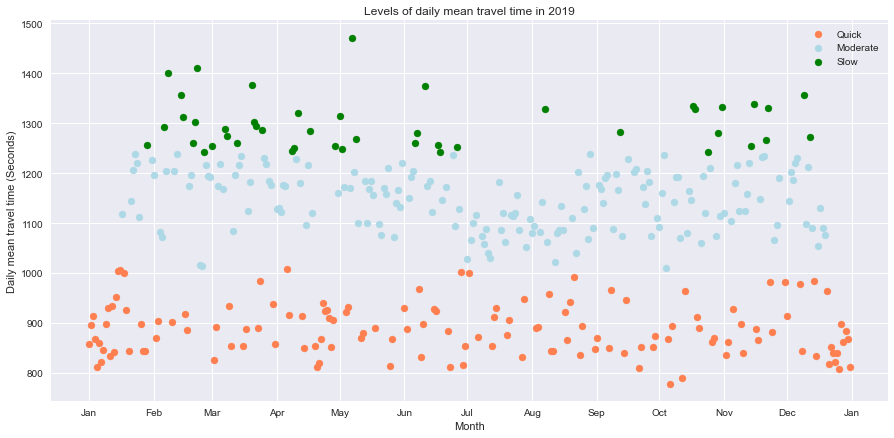

In [39]:
from datetime import timedelta
import matplotlib.dates as mdates

final_df.index= pd.to_datetime(final_df.index)
months = mdates.MonthLocator() 
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(final_df[final_df.level=="1"].index, final_df[final_df.level=="1"]['Daily Mean Travel Time (Seconds)'], c='coral', label='Quick')
ax.scatter(final_df[final_df.level=="2"].index, final_df[final_df.level=="2"]['Daily Mean Travel Time (Seconds)'], c='lightblue', label='Moderate')
ax.scatter(final_df[final_df.level=="3"].index, final_df[final_df.level=="3"]['Daily Mean Travel Time (Seconds)'], c='green', label='Slow')
ax.legend()

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')) # Change the format of x axis into months

plt.title('Levels of daily mean travel time in 2019')
plt.xlabel('Month')
plt.ylabel('Daily mean travel time (Seconds)')

plt.show()

### Logistic Regression

In [40]:
X = final_df[['Maximum temperature (Degree C)', 'Rainfall amount (millimetres)', 'TotalVolume','Rainfall_airport amount']]
y = final_df['level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Output the accuracy on training data and test data respectively
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f \n' % accuracy)

Accuracy: 0.6620 



### K-Neighbor Classifier

In [42]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
y_pred = clf_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f \n' % accuracy)

Accuracy: 0.6901 



**Conclusion:** Both models have moderate accuracy score and give much better results than linear regression. As we can see, K-neighbor classifier (0.69) has higher accuracy score than Logistic Regression (0.66).

### Feature Importance Using RFE

In [44]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

estimator =  LogisticRegression()
rmse_scores = []
for i in range(1,5):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)


RMSE score on test set using 1 features:  0.7599110400121809
RMSE score on test set using 2 features:  0.7505866250408015
RMSE score on test set using 3 features:  0.7505866250408015
RMSE score on test set using 4 features:  0.5814018997338111


# Project Conclusion

Uber's travel time in one year (2019) has significant fluctuations. The average daily travel time peaked around May, with more than 1,400 seconds. Meanwhile, Uber's average daily travel time hit a low in October, with seconds below 800. 

Total traffic volumn appears to affect daily travel time the most; meanwhile, rainfall amount unexpectedly has a considerably low correlation with travel time. 

To predict exactly travel time, the more features was used, the less overfitting the model becomes. However, linear model still shows its ineffectiveness.

After classifying travel time into 3 levels, we can see that Logistic Regression and K-Neighbor Classifier are very effective in predicting travel time level, with accuracy scores of 0.66 and 0.69, respectively. In terms of Logistic Regression, the model shows a significantly low RMSE score when using 4 features, comparing to the Linear regression model. 

**In the future, we can improve our models by using more travel time data from previous years and exploring more factors that can affect travel time. However, the latter can face a limitation due to the scarcity of available online data.**